In [ ]:

def create_agent():
    return {
        'id': 0,
        'alpha': 0.0,
        'goods': 0.0,
        'eta': 0.0,
        'money': 0.0,
        'utility': 0.0,
        'num_intra_connections': 0,
        'intra_connections': 0,
        'num_inter_connections': 0,
        'inter_connections':0,
        'Util_func': 0
    }



## define encounter matrix

In [ ]:
import numpy as np

# Create a 1000x1000 matrix filled with 1s
matrix = np.ones((1000, 1000))

# Set the diagonal elements to 0
np.fill_diagonal(matrix, 0)

matrix2 = np.ones((100, 100))

# Set the diagonal elements to 0
np.fill_diagonal(matrix2, 0)


# Define Agent a

In [ ]:
import random
# Creating the lists
id_list = [i for i in range(1000)]
alpha = [2]*1000

eta = [2]*1000
#goods = [random.randint(10, 90) for _ in range(100)]
#money = [random.randint(100, 900) for _ in range(100)]
goods = [200 for _ in range(1000)]
money = [200 for _ in range(1000)]
inter_connections=matrix
intra_connections=0

In [ ]:
agent_a = create_agent()
agent_a['id_list'] = id_list
agent_a['alpha']=alpha
agent_a['eta']=eta
agent_a['money']=money
agent_a['goods']=goods
agent_a['intra_connections']=intra_connections
agent_a['inter_connections']=inter_connections


## define agent b

In [ ]:
import random
# Creating the lists
id_list = [i for i in range(1000)]
alpha = [3]*1000

eta = [3]*1000

goods = [150 for _ in range(1000)]
money = [150 for _ in range(1000)]
inter_connections=matrix2
intra_connections=matrix


In [ ]:
agent_b = create_agent()
agent_b['id_list'] = id_list
agent_b['alpha']=alpha
agent_b['eta']=eta
agent_b['money']=money
agent_b['goods']=goods
agent_b['intra_connections']=intra_connections
agent_b['inter_connections']=inter_connections


## define trader


In [ ]:
import numpy as np

# Create a 1000x1000 matrix filled with 1s
matrix3 = np.ones((1000, 1000))

# Set the diagonal elements to 0
np.fill_diagonal(matrix3, 0)

In [ ]:
id_list = [i for i in range(10)]
alpha = [2]*1000

eta = [2]*1000
#goods = [random.randint(10, 90) for _ in range(100)]
#money = [random.randint(100, 900) for _ in range(100)]
goods = [40 for _ in range(1000)]
money = [40 for _ in range(1000)]
inter_connections=matrix
intra_connections=0

In [ ]:
agent_c = create_agent()
agent_c['id_list'] = id_list
agent_c['alpha']=alpha
agent_c['eta']=eta
agent_c['money']=money
agent_c['goods']=goods
agent_c['intra_connections']=intra_connections
agent_c['inter_connections']=inter_connections

## trade

In [ ]:


def random_pick(g, G, a):
    # Randomly select a number within the range [g-mg, g+mg]
    delta_g=round(G*a)
    new_g = random.randint(g - delta_g, g + delta_g)

    # Apply the reflex logic
    if new_g < 0:
        new_g =- new_g
    elif new_g > G:
        new_g = 2*G - new_g

    return new_g




In [ ]:
def random_pick2(g, G, a):
    # Randomly select a number within the range [g-mg, g+mg]
    delta_g=G*a
    new_g = random.uniform(g - delta_g, g + delta_g)

    # Apply the reflex logic
    if new_g < 0.1:
        new_g =0.2 - new_g
    elif new_g > G-0.1:
        new_g = 2*(G-0.1) - new_g

    return new_g

## trade func

In [ ]:
import random
import math

def trade(good1,good2,money1,money2,eta1,eta2,alpha1,alpha2):


    i=0
    M=money1+money2
    G=good1+good2

    while i <100:

        # Generate a random reallocation
        new_good  = random_pick2(good1,G,0.3)
        new_money = random_pick2(money1,M,0.3)



        # Calculate the change in utility
        money_utility1 = utility_func(money1,money2,good1,good2, alpha1,alpha2, eta1,eta2)

        money_utility2 =utility_func(new_money,(M-new_money),new_good,(G-new_good), alpha1,alpha2, eta1,eta2)


        if money_utility2 > money_utility1:
            # Accept the reallocation


            money1 = new_money

            money2 = M-new_money

            good1=new_good

            good2=G-new_good

        else:
            # Decide with a probability whether to accept the reallocation
            probability = (money_utility2/money_utility1)
            if random.random() < probability:


                money1 = new_money

                money2 = M-new_money

                good1=new_good
                good2=G-new_good




        i=i+1




    return good1,good2,money1,money2






In [ ]:
def utility_func(g1,g2,m1,m2,alpha1,alpha2,eta1,eta2):
  a=m1**(eta1-1)
  b=m2**(eta2-1)
  c=g1**(alpha1-1)
  d=g2**(alpha2-1)
  utility=a*b*c*d
  utility=float(utility)
  return utility

In [48]:
def trade_p(good1,money1, alpha1, eta1,miu):


    i=0
    G=good1+(money1/miu)


    while i <100:

        # Generate a random reallocation
        new_good  = random_pick2(good1,G,0.3)
        new_money =money1- miu*(new_good-good1)



        # Calculate the change in utility
        money_utility1 = utility_func(good1,1,money1,1, alpha1,1, eta1,1)

        money_utility2 =utility_func(new_good,1,new_money,1, alpha1,1, eta1,1)


        if money_utility2 > money_utility1:
            # Accept the reallocation


            money1 = money1+0.01*(new_money-money1)



            good1=good1+0.01*(new_good-good1)



        else:
            # Decide with a probability whether to accept the reallocation
            probability = (money_utility2/money_utility1)
            if random.random() < probability:


                money1 = money1+0.01*(new_money-money1)



                good1=good1+0.01*(new_good-good1)




        i=i+1




    return good1,money1



## trade money

In [ ]:
def trade_m(money1,money2,eta1,eta2):


    i=0
    M=money1+money2


    while i <100:

        # Generate a random reallocation
        new_money = random_pick2(money1,M,0.1)



        # Calculate the change in utility
        money_utility1 = utility_func(1,1,money1,money2, 0,0, eta1,eta2)

        money_utility2 =utility_func(1,1,new_money,(M-new_money), 0,0, eta1,eta2)


        if money_utility2 > money_utility1:
            # Accept the reallocation


            money1 = new_money

            money2 = M-new_money



        else:
            # Decide with a probability whether to accept the reallocation
            probability = (money_utility2/money_utility1)
            if random.random() < probability:


                money1 = new_money

                money2 = M-new_money






        i=i+1




    return money1,money2

## different encounter rate

In [ ]:
import random

def encounter1(matrix):
    # Pick a random row
    row = random.choice(range(len(matrix)))

    # Pick a random column different from the row
    possible_cols = [i for i in range(len(matrix[0])) if i != row]
    col = random.choice(possible_cols)

    return row, col





# same random encounter rate


## inter trade

In [ ]:
def agent_inter_trade(list1,list2,matrix_i,alpha_1,alpha_2):
  a1,a2=encounter1(matrix_i)
  m1=list1.copy()
  m2=list2.copy()
  money1=list1[a1]
  money2=list2[a2]
  alpha1=alpha_1[a1]
  alpha2=alpha_2[a2]
  m1n,m2n=trade_m(money1,money2,alpha1,alpha2)

  m1[a1]=m1n
  m2[a2]=m2n
  return m1,m2

In [ ]:
from numpy.core.shape_base import atleast_2d
def agent_intra_trade(list1,list2,matrix_i,alpha_1,eta_1):
  a1,a2=encounter1(matrix_i)
  money1=list2[a1]
  money2=list2[a2]
  good1=list1[a1]
  good2=list1[a2]
  alpha1=alpha_1[a1]
  alpha2=alpha_1[a2]
  eta1=eta_1[a1]
  eta2=eta_1[a2]


  g1n,g2n,m1n,m2n=trade(good1,good2,money1,money2,alpha1,alpha2,eta1,eta2)
  list2[a1]=m1n
  list2[a2]=m2n
  list1[a1]=g1n
  list1[a2]=g2n

  return list1,list2

In [ ]:
def agent_intra_mtrade(list1,matrix_i,alpha_1):
  a1,a2=encounter1(matrix_i)
  money1=list1[a1]
  money2=list1[a2]
  alpha1=alpha_1[a1]
  alpha2=alpha_1[a2]
  m1n,m2n=trade_m(money1,money2,alpha1,alpha2)
  list1[a1]=m1n
  list1[a2]=m2n

  return list1

In [44]:
def agent_inter_tradep(list1,list2,matrix_i,miu):
  a1=random.randint(0, 999)
  money1=list2[a1]
  good1=list1[a1]
  alpha=2
  eta=2

  g1n,m1n=trade_p(good1,money1,alpha,eta,miu)


  list2[a1]=m1n
  list1[a1]=g1n

  return list1,list2

In [ ]:
def calculate_time_averages_last_1000(lst):
    # Check if the list has at least 1000 items
    if len(lst) < 1000:
        a=calculate_time_averages(lst)
        return a

    # Focus on the last 1000 items
    last_1000_items = lst[-1000:]
    time_averages = []
    cumulative_sum = 0

    for i in range(len(last_1000_items)):
        cumulative_sum += last_1000_items[i]
        time_avg = cumulative_sum / (i + 1)
        time_averages.append(time_avg)

    return time_averages




In [ ]:
def average_last_1000(lst):
    if len(lst) < 10000:
        return np.mean(lst)
    return sum(lst[-10000:]) / 10000




In [ ]:
import random

def calculate_averages(lst, chunk_size):
    averages = []
    for i in range(0, len(lst), chunk_size):
        if i < chunk_size:
            chunk = lst[0:i+1]  # Average the first 0 to i items
        else:
            chunk = lst[i - chunk_size + 1:i+1]  # Average i-chunk_size to i items

        averages.append(sum(chunk) / len(chunk))
    return averages







In [ ]:

def calculate_time_averages(lst):
    time_averages = []
    cumulative_sum = 0

    for i in range(len(lst)):
        cumulative_sum += lst[i]
        time_avg = cumulative_sum / (i + 1)
        time_averages.append(time_avg)

    return time_averages






## Two economy

In [ ]:
def inter_trade(agent1,agent2):
  matrix=agent1['inter_connections']
  moneya=agent1['money'].copy()
  moneyb=agent2['money'].copy()
  gooda=agent1['goods'].copy()
  goodb=agent2['goods'].copy()

  alphaa=agent1['alpha']
  alphab=agent2['alpha']
  etaa=agent1['eta']
  etab=agent2['eta']
  moneya_his=[]
  moneyb_his=[]

  for j in range(50000):
    # trade in economy a
    new_gooda,new_moneya=agent_intra_trade(gooda,moneya,matrix,alphaa,etaa)

    moneya=new_moneya.copy()
    gooda=new_gooda.copy()
    # trade in economy b
    new_goodb,new_moneyb=agent_intra_trade(goodb,moneyb,matrix,alphab,etab)
    moneyb=new_moneyb.copy()
    goodb=new_goodb.copy()
    # inter trade

    moneya_his.append(sum(moneya))
    moneyb_his.append(sum(moneyb))

  for i in range(100000):
    # trade in economy a
    new_gooda,new_moneya=agent_intra_trade(gooda,moneya,matrix,alphaa,etaa)

    moneya=new_moneya.copy()
    gooda=new_gooda.copy()
    # trade in economy b
    new_goodb,new_moneyb=agent_intra_trade(goodb,moneyb,matrix,alphab,etab)
    moneyb=new_moneyb.copy()
    goodb=new_goodb.copy()
    # inter trade
    new_a,new_b=agent_inter_trade(moneya,moneyb,matrix2,alphaa,alphab)
    moneya=new_a.copy()
    moneyb=new_b.copy()
    moneya_his.append(sum(moneya))
    moneyb_his.append(sum(moneyb))








  return moneya_his,moneyb_his

In [ ]:
ma,mb=inter_trade(agent_a,agent_b)

In [ ]:
ma[1]

200000.0

In [ ]:

Ta = [x / 2000 for x in ma]
Tb=[x / 3000 for x in mb]


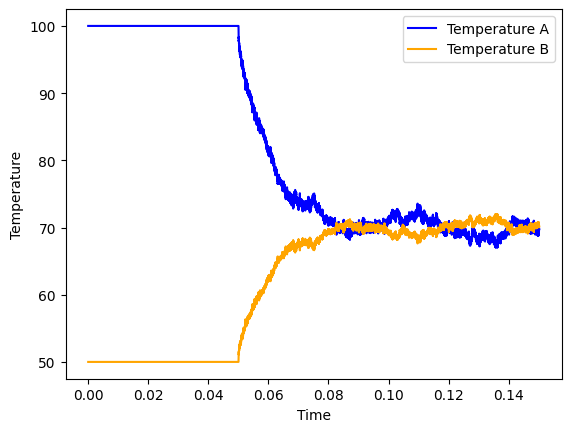

In [ ]:
import matplotlib.pyplot as plt



# Create a range of indices for the x-axis
numbers = list(range(1, 150001))
result = [num / 999000 for num in numbers]

# Plot both lists on the same graph
plt.plot(result, Ta, label='Temperature A', color='blue')
plt.plot(result, Tb, label='Temperature B', color='orange')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()

# Show the plot
plt.show()

## Trade at Price

In [50]:
moneyb=[40]*1000
goodb=[40]*1000
alphaa=[2]*1000
alphab=[2]*1000
miu=0.8
G1=0
G_list=[]

for i in range(100000):
  new_goodb2,new_moneyb2=agent_intra_trade(goodb,moneyb,matrix3,alphaa,alphab)
  moneyb=new_moneyb2.copy()
  goodb=new_goodb2.copy()




  ng,nm=agent_inter_tradep(goodb,moneyb,matrix3,miu)
  # update economy a only
  print('money',sum(moneyb),'Good',sum(goodb),'G')
  # print('first',j,'second',i)
  moneyb=nm.copy()
  goodb=ng.copy()



  G_list.append(sum(goodb)-40000)


Gk=calculate_averages(G_list,1000)


流式输出内容被截断，只能显示最后 5000 行内容。
money 35958.72982029075 Good 45051.58772463654 G
money 35962.59622914301 Good 45046.75471357122 G
money 35963.832041044385 Good 45045.2099486945 G
money 35963.43210320769 Good 45045.70987099037 G
money 35962.042655906254 Good 45047.44668011719 G
money 35964.46158395487 Good 45044.42302005641 G
money 35966.605384717106 Good 45041.7432691036 G
money 35968.617137888665 Good 45039.22857763916 G
money 35967.28003704686 Good 45040.89995369141 G
money 35970.74190416951 Good 45036.57261978812 G
money 35971.59984390558 Good 45035.50019511804 G
money 35969.6737074268 Good 45037.9078657165 G
money 35968.90477778155 Good 45038.86902777306 G
money 35969.371399890355 Good 45038.28575013705 G
money 35972.105631978186 Good 45034.86796002725 G
money 35975.06538397851 Good 45031.16827002685 G
money 35977.9305544711 Good 45027.58680691111 G
money 35978.26474517895 Good 45027.16906852631 G
money 35978.82441353846 Good 45026.46948307692 G
money 35977.03433353036 Good 45028.707083

KeyboardInterrupt: 

In [61]:
import matplotlib.pyplot as plt
alphaa=[2]*1000
alphab=[2]*1000

miu_values = [0.9, 0.95, 1.0, 1.05, 1.1]

# Initialize a list to store time-averaged Gk values for each miu
Gk_lists = []
j=0
# Run the simulation for each miu
for miu in miu_values:
    j=j+1
    G1 = 0
    G_list = []
    moneyb = [40] * 1000
    goodb = [40] * 1000
    for k in range(5000):
      new_goodb3,new_moneyb3=agent_intra_trade(goodb,moneyb,matrix3,alphaa,alphab)
      moneyb=new_moneyb3.copy()
      goodb=new_goodb3.copy()
      g1=sum(goodb)-40000
      G_list.append(g1)


    for i in range(45000):

        new_goodb2,new_moneyb2=agent_intra_trade(goodb,moneyb,matrix3,alphaa,alphab)
        moneyb=new_moneyb2.copy()
        goodb=new_goodb2.copy()




        ng,nm=agent_inter_tradep(goodb,moneyb,matrix3,miu)
        # update economy a only
        print('time',j,'iter',i)
        # print('first',j,'second',i)
        moneyb=nm.copy()
        goodb=ng.copy()
        #G1=G1+gap_m2
        G1=sum(goodb)-40000
        G_list.append(G1)
        # Calculate gap_m2 and update moneyb and goodb

    # Gk = calculate_averages(G_list,100)
    Gk=G_list
    Gk_lists.append(Gk)




流式输出内容被截断，只能显示最后 5000 行内容。
time 5 iter 40000
time 5 iter 40001
time 5 iter 40002
time 5 iter 40003
time 5 iter 40004
time 5 iter 40005
time 5 iter 40006
time 5 iter 40007
time 5 iter 40008
time 5 iter 40009
time 5 iter 40010
time 5 iter 40011
time 5 iter 40012
time 5 iter 40013
time 5 iter 40014
time 5 iter 40015
time 5 iter 40016
time 5 iter 40017
time 5 iter 40018
time 5 iter 40019
time 5 iter 40020
time 5 iter 40021
time 5 iter 40022
time 5 iter 40023
time 5 iter 40024
time 5 iter 40025
time 5 iter 40026
time 5 iter 40027
time 5 iter 40028
time 5 iter 40029
time 5 iter 40030
time 5 iter 40031
time 5 iter 40032
time 5 iter 40033
time 5 iter 40034
time 5 iter 40035
time 5 iter 40036
time 5 iter 40037
time 5 iter 40038
time 5 iter 40039
time 5 iter 40040
time 5 iter 40041
time 5 iter 40042
time 5 iter 40043
time 5 iter 40044
time 5 iter 40045
time 5 iter 40046
time 5 iter 40047
time 5 iter 40048
time 5 iter 40049
time 5 iter 40050
time 5 iter 40051
time 5 iter 40052
time 5 iter 40053
t

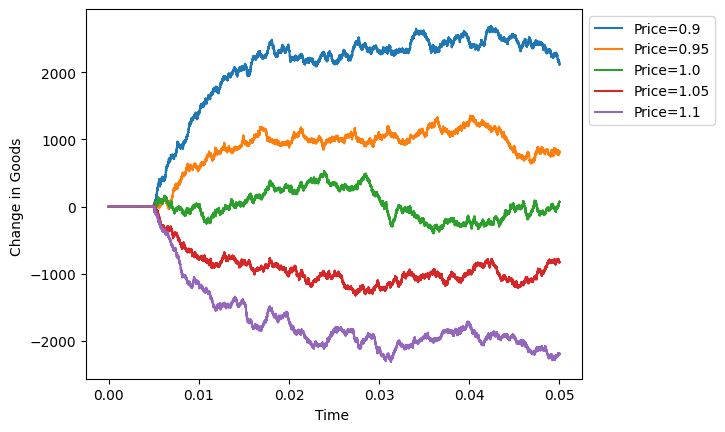

In [62]:
# Create x values for the plot (index / 10000)
x_values = [i / 1000000 for i in range(len(Gk_lists[0]))]

# Create the plot for each Gk_list
for i, Gk in enumerate(Gk_lists):
    plt.plot(x_values, Gk, label=f'Price={miu_values[i]}')

# Add labels and a legend
plt.xlabel('Time ')
plt.ylabel('Change in Goods ')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust the bbox_to_anchor as needed

# Show the plot
plt.show()

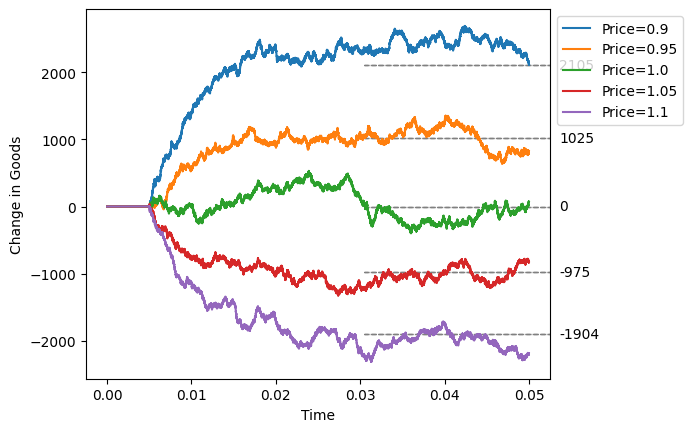

In [69]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Your existing x values and plot code
x_values = [i / 1000000 for i in range(len(Gk_lists[0]))]
for i, Gk in enumerate(Gk_lists):
    plt.plot(x_values, Gk, label=f'Price={miu_values[i]}')

# Define the horizontal lines

line_y_values = [-1904, -975, 0, 1025, 2105]
right_limit = plt.gca().get_xlim()[1]  # Right edge of the plot
line_length = 0.4 * (plt.gca().get_xlim()[1] - plt.gca().get_xlim()[0])  # 20% of the plot width

# Add horizontal lines and labels outside the graph
for y_val in line_y_values:


    line = patches.FancyBboxPatch((right_limit - line_length, y_val), line_length, 0,
                                boxstyle="Square,pad=0", linestyle="--", color="gray")
    plt.gca().add_patch(line)
    # plt.text(right_limit, y_val, str(y_val), va='center', ha='right')
    plt.text(1.02, y_val, str(y_val), va='center', ha='left', transform=plt.gca().get_yaxis_transform())

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Change in Goods')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust the right margin to ensure labels are not cut off
plt.subplots_adjust(right=0.85)

# Show the plot
plt.show()




In [ ]:
len(Gk_lists[0])

500

In [ ]:
# Your Gk_list with 5 lists
Gk_list2 = Gk_lists.copy()

# Add 10,000 zeros at the beginning of each list
for i in range(len(Gk_list2)):
    Gk_list2[i] = [0] * 60000 + Gk_list2[i]

# Gk_list now contains 5 lists with 10,000 zeros added at the beginning of each list


-6.392146740406563

In [ ]:
m,Gc=inter_trade(agent_a,agent_b,agent_c)

0 number 0 Gap 10146.90501005269 price 0.1
0 number 1 Gap 9153.642804419782 price 0.15000000000000002
0 number 2 Gap 7881.054532988786 price 0.2
0 number 3 Gap 6914.553284150377 price 0.25
0 number 4 Gap 5661.162777620035 price 0.3
0 number 5 Gap 3660.6612491944356 price 0.35
0 number 6 Gap 3340.069961969194 price 0.39999999999999997
0 number 7 Gap 1978.5959695426134 price 0.44999999999999996
0 number 8 Gap 2337.9838541408835 price 0.49999999999999994
0 number 9 Gap 927.027156488602 price 0.5499999999999999
0 number 10 Gap 663.4212753026762 price 0.6
0 number 11 Gap -1241.554666346014 price 0.65


KeyboardInterrupt: ignored

In [ ]:
len(Gc2[1])

1892

ValueError: ignored

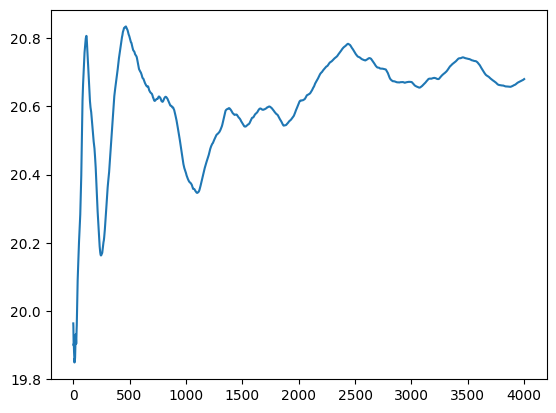

In [ ]:
import matplotlib.pyplot as plt





# Create the plot
plt.plot(Gc, m, label='List c')

# Add labels and a title if needed
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of lista from index 1 to 3000')
plt.legend()
# Display the plot
plt.show()


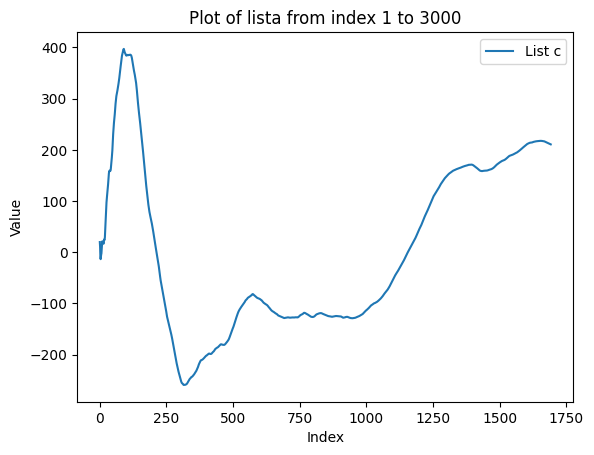

In [ ]:
# Extract the data from index 1 to 3000
subset = Gc2[4]

# Create x values for the plot (assuming you want to use the index as x values)
x_values = range(1, len(subset) + 1)

# Create the plot
plt.plot(x_values, subset, label='List c')

# Add labels and a title if needed
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of lista from index 1 to 3000')
plt.legend()
# Display the plot
plt.show()

In [ ]:
gl

[132.0473195048729,
 -447.18048140710897,
 -18.471211539921512,
 -227.46039183050476,
 -568.1448105871315]

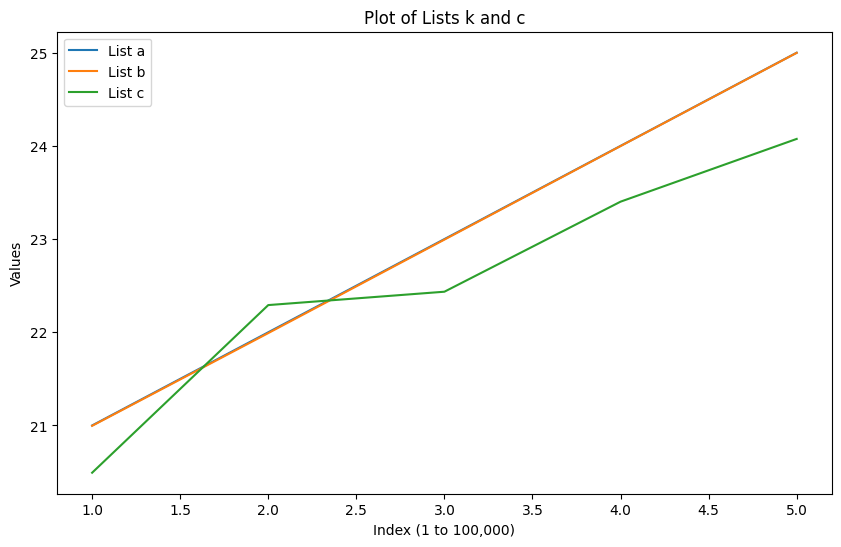

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'k' and 'c' are your lists and each contains 100,000 elements
# If you don't have these lists, replace 'k' and 'c' with your actual list names

# Generating index values from 1 to 100,000
index = list(range(1, 6))

# Plotting the lists
plt.figure(figsize=(10, 6))
plt.plot(index, a, label='List a')
plt.plot(index, Tb, label='List b')
plt.plot(index, Tc, label='List c')
plt.xlabel('Index (1 to 100,000)')
plt.ylabel('Values')
plt.title('Plot of Lists k and c')
plt.legend()

plt.show()


18000

In [ ]:
G1=g1
T1=t1
S1=S

392702

In [ ]:
import math

# Example data (replace with your actual data)
G1 = g1
T1 = t1

# Calculate the entropy for each item in G1 and T1
entropy = [200 * (math.log(G1[i])+math.log(T1[i])) for i in range(len(G1))]




In [ ]:
price = [(T1[i] * 200) / G1[i] for i in range(len(G1))]

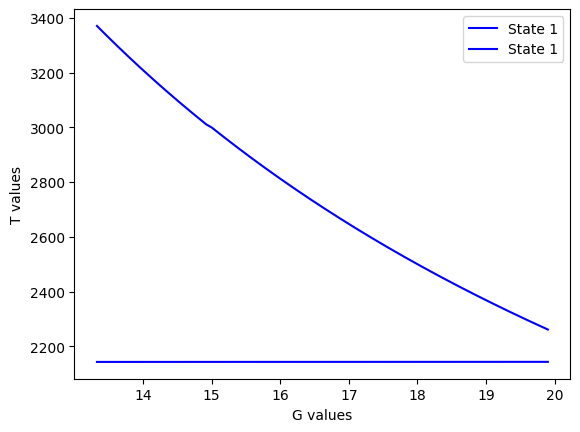

In [ ]:
import matplotlib.pyplot as plt

# Initialize empty lists for State 1
G1_1, T1_1 = [], []
E1=[]
P1=[]
# Divide items based on states
for i, state in enumerate(S1):
    if state == 1:
        G1_1.append(G1[i])
        T1_1.append(T1[i])
        E1.append(entropy[i])
        P1.append(price[i])

# Sort G1_1 and T1_1 together based on G1_1
sorted_data = sorted(zip(G1_1, T1_1,E1,P1), key=lambda x: x[0])
G1_1_sorted, T1_1_sorted,E1_sorted,P1_sorted = zip(*sorted_data)

# Plot T1_1 on G1_1 with different colors using plt.plot
plt.plot(T1_1_sorted, G1_1_sorted, label='State 1', color='blue')
plt.plot(T1_1_sorted, E1_sorted, label='State 1', color='blue')
# Add labels and legend
plt.xlabel('G values')
plt.ylabel('T values')
plt.legend()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
G1=g1
T1=t1
S1=S




# Initialize empty lists for each state
G1_1, G1_2, G1_3, G1_4 = [], [], [], []
T1_1, T1_2, T1_3, T1_4 = [], [], [], []
E1,E2,E3,E4=[],[],[],[]
P1,P2,P3,P4=[],[],[],[]
# Divide items based on states
for i, state in enumerate(S1):
    if state == 1:
        G1_1.append(G1[i])
        T1_1.append(T1[i])
        E1.append(entropy[i])
        P1.append(price[i])
    elif state == 2:
        G1_2.append(G1[i])
        T1_2.append(T1[i])
        E2.append(entropy[i])
        P2.append(price[i])
    elif state == 3:
        G1_3.append(G1[i])
        T1_3.append(T1[i])
        E3.append(entropy[i])
        P3.append(price[i])
    elif state == 4:
        G1_4.append(G1[i])
        T1_4.append(T1[i])
        E4.append(entropy[i])
        P4.append(price[i])

# Plot T on G with different colors using plt.plot
plt.plot(G1_1_sorted, T1_1_sorted, label='State 1', color='blue')
plt.plot(G1_2, T1_2, label='State 2', color='green')
plt.plot(G1_3, T1_3, label='State 3', color='red')
plt.plot(G1_4, T1_4, label='State 4', color='purple')

# Add labels and legend
plt.xlabel('Total Goods')
plt.ylabel('Temperature')
plt.legend()

# Show the plot
plt.show()



In [ ]:

# Define a function to calculate the average of a list
def calculate_average(lst):
    return sum(lst) / len(lst)

# Initialize lists to store averages
averages_G1_2, averages_T1_2, averages_E2, averages_G1_4, averages_T1_4, averages_E4,av_P2,av_P4 = [], [], [], [], [], [],[],[]

# Process each list
def process_list(lst, averages):
    # Calculate the number of chunks of 100 items
    num_chunks = len(lst) // 10000

    # Calculate averages for chunks of 100 items
    for i in range(num_chunks):
        chunk = lst[i * 10000: (i + 1) * 10000]
        average = calculate_average(chunk)
        averages.append(average)

    # Calculate the average for any remaining items
    if len(lst) % 10000 != 0:
        remaining_chunk = lst[num_chunks * 10000:]
        average = calculate_average(remaining_chunk)
        averages.append(average)
    averages.insert(0, lst[0])
    averages.append(lst[-1])


# Process each list
process_list(G1_2, averages_G1_2)
process_list(T1_2, averages_T1_2)
process_list(E2, averages_E2)
process_list(G1_4, averages_G1_4)
process_list(T1_4, averages_T1_4)
process_list(E4, averages_E4)
process_list(P2,av_P2)
process_list(P4,av_P4)

# Print the averages
print("Averages for G1_2:", averages_G1_2)
print("Averages for T1_2:", averages_T1_2)
print("Averages for E2:", averages_E2)
print("Averages for G1_4:", averages_G1_4)
print("Averages for T1_4:", averages_T1_4)
print("Averages for E4:", averages_E4)


Averages for G1_2: [2260.999999999999, 2310.51, 2410.51, 2510.51, 2610.51, 2709.8899, 2809.51, 2909.51, 3009.51, 3109.51, 3209.51, 3309.51, 3409.51, 3509.51, 3596.01, 3633.0]
Averages for T1_2: [19.900530503978786, 18.976756894619633, 18.450917441439863, 19.038111475740028, 19.723128710299672, 20.72804054067099, 20.41132766471919, 18.795975456205035, 16.65008797288875, 16.420295199381716, 17.252332255398862, 15.901249563111644, 16.763555734967166, 16.942079360029094, 16.605702041623584, 16.52179107975076]
Averages for E2: [2142.861772428896, 2137.6326337657442, 2140.4197882852027, 2154.88636862811, 2169.517759163904, 2187.172255671798, 2191.343771449556, 2181.491393682958, 2164.3039930913574, 2168.1164756461158, 2184.151066977052, 2174.099024616752, 2190.6597111950477, 2198.5787875420124, 2199.4335361251633, 2200.4988426616487]
Averages for G1_4: [5942.999999999999, 5893.02, 5793.02, 5693.02, 5593.02, 5493.02, 5393.02, 5293.02, 5193.02, 5093.02, 4993.02, 4893.02, 4793.0199999999995, 46

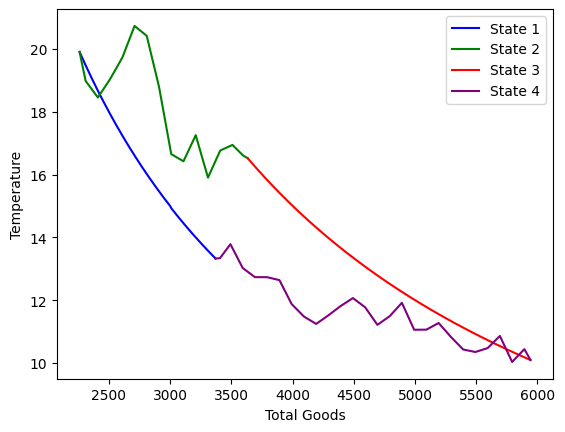

In [ ]:

# Plot T on G with different colors using plt.plot
plt.plot(G1_1_sorted, T1_1_sorted, label='State 1', color='blue')
plt.plot(averages_G1_2, averages_T1_2, label='State 2', color='green')
plt.plot(G1_3, T1_3, label='State 3', color='red')
plt.plot(averages_G1_4, averages_T1_4, label='State 4', color='purple')

# Add labels and legend
plt.xlabel('Total Goods')
plt.ylabel('Temperature')
plt.legend()

# Show the plot
plt.show()

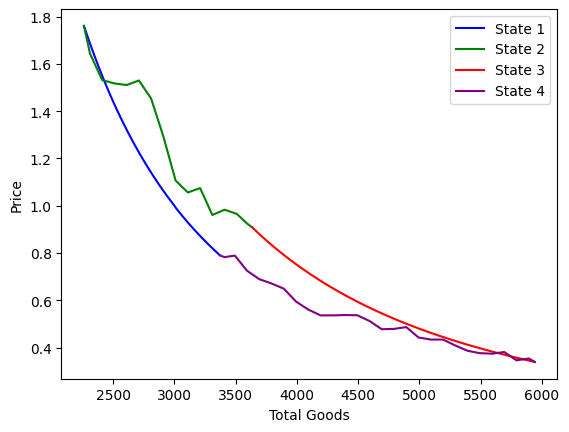

In [ ]:
# Plot T on G with different colors using plt.plot
plt.plot(G1_1_sorted, P1_sorted, label='State 1', color='blue')
plt.plot(averages_G1_2, av_P2, label='State 2', color='green')
plt.plot(G1_3, P3, label='State 3', color='red')
plt.plot(averages_G1_4, av_P4, label='State 4', color='purple')

# Add labels and legend
plt.xlabel('Total Goods')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

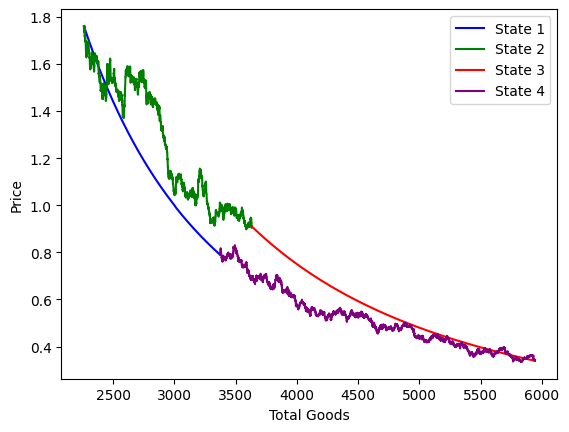

In [ ]:
# Plot T on G with different colors using plt.plot
plt.plot(G1_1_sorted, P1_sorted, label='State 1', color='blue')
plt.plot(G1_2, P2, label='State 2', color='green')
plt.plot(G1_3, P3, label='State 3', color='red')
plt.plot(G1_4, P4, label='State 4', color='purple')

# Add labels and legend
plt.xlabel('Total Goods')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

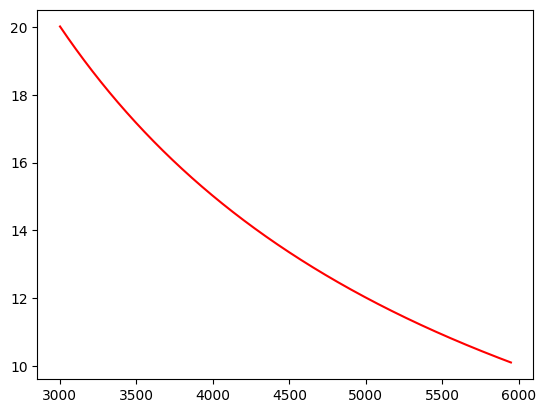

In [ ]:
plt.plot(G1_3, T1_3, label='State 3', color='red')

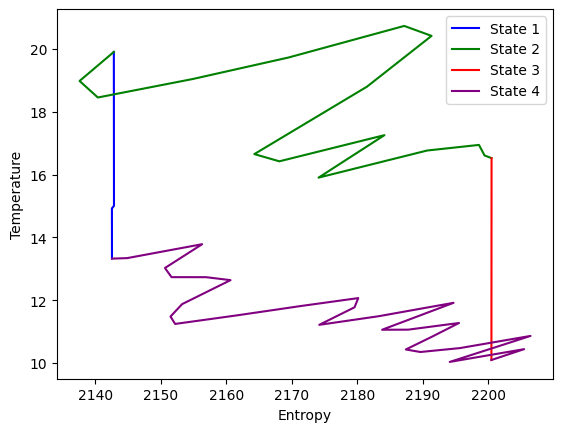

In [ ]:
# Plot T on G with different colors using plt.plot
plt.plot(E1_sorted, T1_1_sorted, label='State 1', color='blue')
plt.plot(averages_E2, averages_T1_2, label='State 2', color='green')
plt.plot(E3, T1_3, label='State 3', color='red')
plt.plot(averages_E4, averages_T1_4, label='State 4', color='purple')

# Add labels and legend
plt.xlabel('Entropy')
plt.ylabel('Temperature')
plt.legend()

# Show the plot
plt.show()


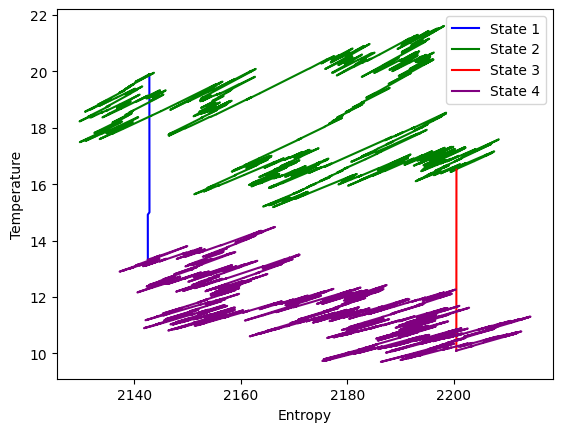

In [ ]:
# Plot T on G with different colors using plt.plot
plt.plot(E1_sorted, T1_1_sorted, label='State 1', color='blue')
plt.plot(E2, T1_2, label='State 2', color='green')
plt.plot(E3, T1_3, label='State 3', color='red')
plt.plot(E4, T1_4, label='State 4', color='purple')

# Add labels and legend
plt.xlabel('Entropy')
plt.ylabel('Temperature')
plt.legend()

# Show the plot
plt.show()

In [ ]:
import numpy as np

# Assuming G1 and T1 are your lists of x and y coordinates
G1 = G1_2
T1 = E2

# Convert the lists to NumPy arrays
G1 = np.array(G1)
T1 = np.array(T1)

# Calculate the derivative using central differences
delta_G1 = np.diff(G1)
delta_T1 = np.diff(T1)
derivative = delta_T1 / delta_G1

# Append the derivative at the last point using forward difference
derivative = np.append(derivative, (T1[-1] - T1[-2]) / (G1[-1] - G1[-2]))

# The derivative at each point corresponds to the slope of the curve at that point
print("Derivative:", derivative)




Derivative: [       nan        nan        nan ... 0.         1.02271995 1.02271995]


<ipython-input-57-d5c9925c5f3e>:14: RuntimeWarning: divide by zero encountered in divide
  derivative = delta_T1 / delta_G1
<ipython-input-57-d5c9925c5f3e>:14: RuntimeWarning: invalid value encountered in divide
  derivative = delta_T1 / delta_G1


In [ ]:
import numpy as np

# Assuming G1 and T1 are your lists of x and y coordinates
G1 = G1_2
T1 = derivative

# Convert the lists to NumPy arrays
G1 = np.array(G1)
T1 = np.array(T1)

# Calculate the derivative using central differences
delta_G1 = np.diff(G1)
delta_T1 = np.diff(T1)
derivative2 = delta_T1 / delta_G1

# Append the derivative at the last point using forward difference
derivative2 = np.append(derivative2, (T1[-1] - T1[-2]) / (G1[-1] - G1[-2]))

# The derivative at each point corresponds to the slope of the curve at that point
print("Derivative:", derivative2)

Derivative: [           nan            nan            nan ... 2.24898495e+12
 0.00000000e+00 0.00000000e+00]


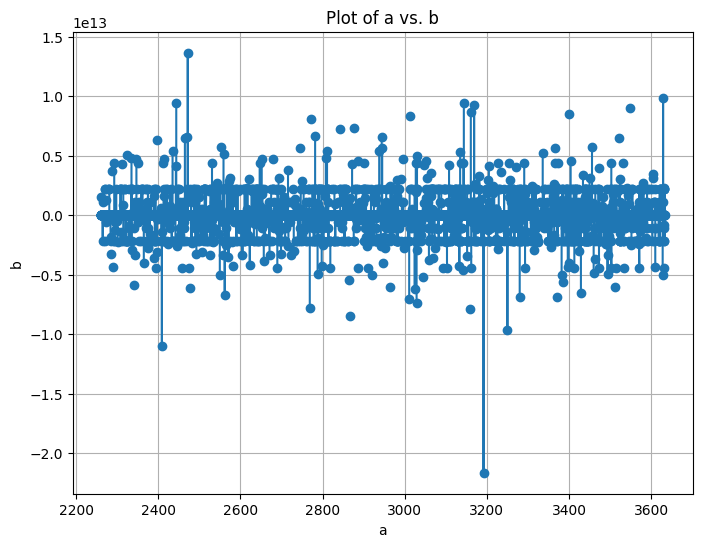

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have two lists or arrays 'a' and 'b'


# Create a plot of 'a' on the x-axis and 'b' on the y-axis
plt.figure(figsize=(8, 6))
plt.plot(G1,derivative2, marker='o', linestyle='-')
plt.xlabel('a')
plt.ylabel('b')
plt.title('Plot of a vs. b')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

def smooth_with_window(input_list, window_size=50000):
    smoothed_list = []
    for i in range(len(input_list)):
        start_index = max(0, i - window_size // 2)
        end_index = min(len(input_list), i + window_size // 2)
        average_value = np.mean(input_list[start_index:end_index])
        smoothed_list.append(average_value)

    # 删除前window_size//2和后window_size//2个元素，使长度减少1000
    smoothed_list = smoothed_list[window_size//2 : -window_size//2]

    return smoothed_list


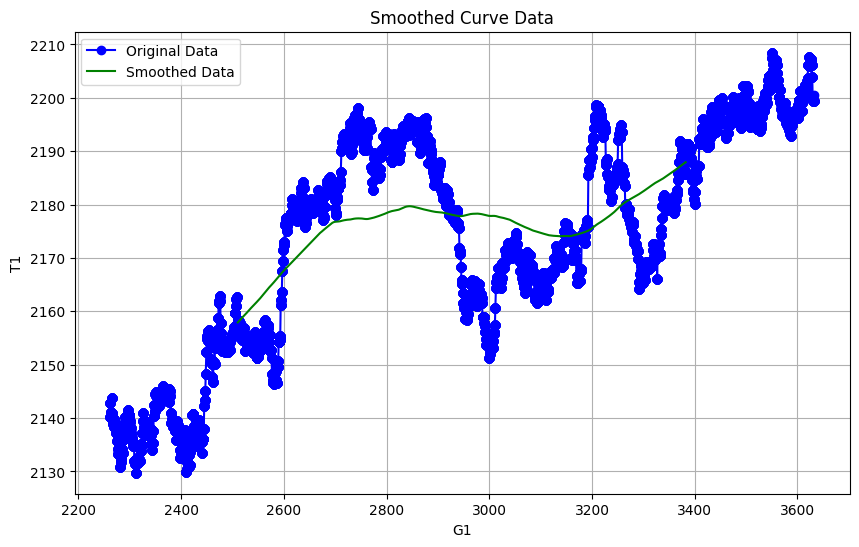

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume you have time points G1 and corresponding values T1
G1 = G1_2
T1 = E2

# Set the window size for moving average, larger window size results in more smoothing
window_size = 1000 # Adjust the window size to fit the data's volatility

# Calculate the moving averages
G1_smooth = smooth_with_window(G1)
T1_smooth = smooth_with_window(T1)

# Plot the original data and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(G1, T1, label='Original Data', marker='o', linestyle='-', color='b')
plt.plot(G1_smooth, T1_smooth, label='Smoothed Data', linestyle='-', color='g')
plt.xlabel('G1')
plt.ylabel('T1')
plt.title('Smoothed Curve Data')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
len(G1_smooth)

136300

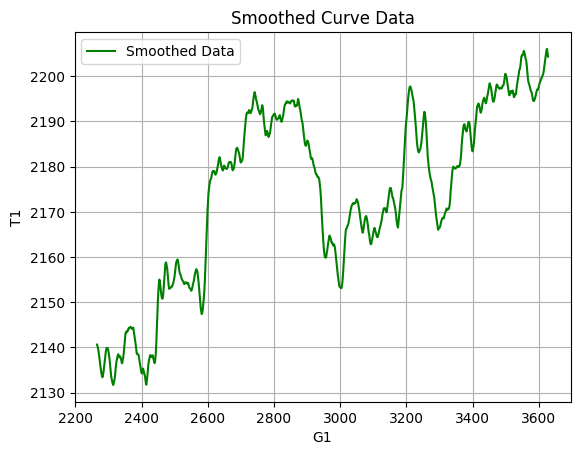

In [ ]:
plt.plot(G1_smooth, T1_smooth, label='Smoothed Data', linestyle='-', color='g')
plt.xlabel('G1')
plt.ylabel('T1')
plt.title('Smoothed Curve Data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
T1_smooth

array([1428.57451495, 2142.86177243, 2142.86177243, ..., 2199.47612271,
       2199.81702936, 1466.65832179])

In [ ]:
E2[1000]

2139.2614710208322

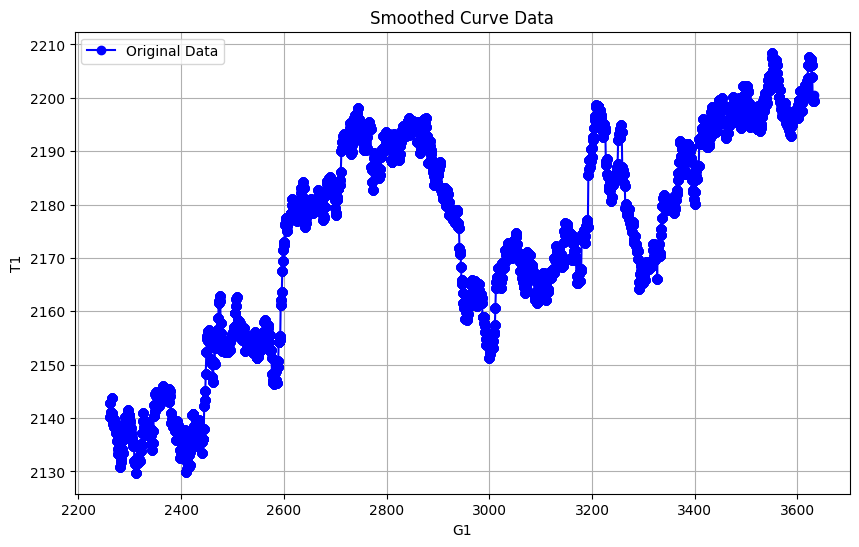

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(G1, T1, label='Original Data', marker='o', linestyle='-', color='b')

plt.xlabel('G1')
plt.ylabel('T1')
plt.title('Smoothed Curve Data')
plt.legend()
plt.grid(True)
plt.show()

array([2999., 2998., 2997., ..., 3012., 3011., 3010.])

In [ ]:
# Define a function to calculate the average of a list
def calculate_average(lst):
  c=np.mean(lst)
  return c

# Initialize lists to store averages
aver_C, aver_B,aver_A = [],[],[]

# Process each list
def process_list(lst, averages):
    # Calculate the number of chunks of 100 items
    num_chunks = len(lst) // 1000

    # Calculate averages for chunks of 100 items
    for i in range(num_chunks):
        chunk = lst[i * 1000: (i + 1) * 1000]
        average = calculate_average(chunk)
        averages.append(average)

    # Calculate the average for any remaining items
    if len(lst) % 1000 != 0:
        remaining_chunk = lst[num_chunks * 10000:]
        average = calculate_average(remaining_chunk)
        averages.append(average)
    averages.insert(0, lst[0])
    averages.append(lst[-1])


# Process each list
process_list(T1, aver_C)
process_list(a, aver_A)
process_list(b, aver_B)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
a = [x * 1.5 for x in a]

In [ ]:
b= [x / 1.5 for x in b]

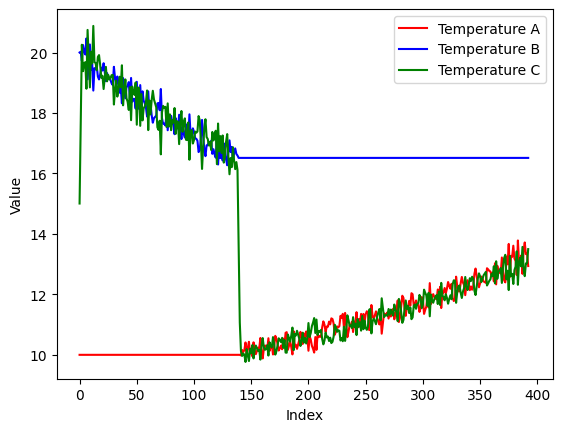

In [ ]:
import matplotlib.pyplot as plt

# Sample data for aver_A, aver_B, and aver_C (replace with your actual data)


# Index labels for the x-axis (replace with your actual labels)
index_labels = np.arange(len(aver_A))

# Plot aver_A in red, aver_B in blue, and aver_C in green with labels
plt.plot(index_labels, aver_A, color='red', label='Temperature A')
plt.plot(index_labels, aver_B, color='blue', label='Temperature B')
plt.plot(index_labels, aver_C, color='green', label='Temperature C')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()
